# Dataframe of Summit for Democracy and Democracy index 

## Import package

In [1]:
# basic package
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# for web scraping
import requests
from bs4 import BeautifulSoup
import time
# for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression 

## Web crawler

### Summit table

In [2]:
# summit table crawler
summiturl = requests.get('https://en.wikipedia.org/wiki/Summit_for_Democracy').text
soup = BeautifulSoup(summiturl, 'lxml')
my_table = soup.find('table',{'class': 'wikitable sortable'})
summit_table = pd.read_html(str(my_table))
# convert list to dataframe
summit_table = pd.DataFrame(summit_table[0])
summit_table

,Participant,Region,Attending?[10],Democracy Index[citation needed]
0,Angola,Africa,Yes[11],3.66
1,Botswana,Africa,Yes[12],7.62
2,Cape Verde,Africa,Yes[13],7.65
3,DR Congo,Africa,Yes[14],1.13
4,Ghana,Africa,Yes[15],6.50
...,...,...,...,...
107,Samoa,Oceania,Yes[115],NaN
108,Solomon Islands,Oceania,NaN,NaN
109,Tonga,Oceania,NaN,NaN
110,Tuvalu,Oceania,NaN,NaN


In [3]:
# data cleaning
summit_table.columns = ['Country', 'Region', 'Attending', '2020']
a01 = summit_table['Attending'].str.contains('Yes', regex=False)
a01.loc[a01 == True] = 1
a01.loc[a01 == False] = 0
summit_table['Attending'] = pd.DataFrame(a01)
summit_table

,Country,Region,Attending,2020
0,Angola,Africa,1,3.66
1,Botswana,Africa,1,7.62
2,Cape Verde,Africa,1,7.65
3,DR Congo,Africa,1,1.13
4,Ghana,Africa,1,6.50
...,...,...,...,...
107,Samoa,Oceania,1,NaN
108,Solomon Islands,Oceania,NaN,NaN
109,Tonga,Oceania,NaN,NaN
110,Tuvalu,Oceania,NaN,NaN


### Democracy Index table

In [4]:
# democracy Index table crawler
url = 'https://en.wikipedia.org/wiki/Democracy_Index'
df_list = pd.read_html(url)
index_table = df_list[5] # while there is not only one table on the page
index_table = index_table.sort_values(by = '2021', ascending=False)
index_table

,Region,2021 rank,Country,Regime type,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
16,Western Europe,1,Norway,Full democracy,9.75,9.81,9.87,9.87,9.87,9.93,9.93,9.93,9.93,9.93,9.80,9.80,9.68,9.55
91,Asia and Australasia,2,New Zealand,Full democracy,9.37,9.25,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.19,9.01
6,Western Europe,3,Finland,Full democracy,9.27,9.20,9.25,9.14,9.03,9.03,9.03,9.03,9.03,9.06,9.06,9.19,9.25,9.25
19,Western Europe,4,Sweden,Full democracy,9.26,9.26,9.39,9.39,9.39,9.39,9.45,9.73,9.73,9.73,9.50,9.50,9.88,9.88
10,Western Europe,5,Iceland,Full democracy,9.18,9.37,9.58,9.58,9.58,9.50,9.58,9.58,9.65,9.65,9.65,9.65,9.65,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sub-Saharan Africa,162,Central African Republic,Authoritarian,1.43,1.32,1.32,1.52,1.52,1.61,1.57,1.49,1.49,1.99,1.82,1.82,1.86,1.61
135,Sub-Saharan Africa,164,Democratic Republic of the Congo,Authoritarian,1.40,1.13,1.13,1.49,1.61,1.93,2.11,1.75,1.83,1.92,2.15,2.15,2.28,2.76
92,Asia and Australasia,165,North Korea,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,0.86,1.03
89,Asia and Australasia,166,Myanmar,Authoritarian,1.02,3.04,3.55,3.83,3.83,4.20,4.14,3.05,2.76,2.35,1.77,1.77,1.77,1.77


### Democracy Index table with other variable from Chinese url

In [5]:
# democracy Index table crawler(chinese)
url = 'https://zh.wikipedia.org/wiki/%E6%B0%91%E4%B8%BB%E6%8C%87%E6%95%B0'
df_list = pd.read_html(url)
index_chi = df_list[5] # while there is not only one table on the page
index_chi

,排名,Δ 排名,國家與地區,政體類型,選舉過程與多樣性,政府運作,政治參與,政治文化,公民自由,總分,Δ 分數
,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主
0,1,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...
165,162,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
166,164,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
167,165,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━


In [6]:
# data cleaning
index_chi = index_chi.rename(columns={'排名': '2021 rank', '國家與地區': 'Country', '選舉過程與多樣性': 'Election', '政府運作': 'Government', '政治參與': 'Participate',
             '政治文化': 'Culture', '公民自由': 'Freedom'})
index_chi

,2021 rank,Δ 排名,Country,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主,完全民主
0,1,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...
165,162,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
166,164,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
167,165,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━


In [7]:
# multi level data to single level data with droplevel
index_chi.columns = index_chi.columns.droplevel(1) 
index_chi 

,2021 rank,Δ 排名,Country,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
0,1,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...
165,162,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
166,164,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
167,165,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━
168,166,▼ 31,緬甸,專制政權,0.00,0.00,1.67,3.13,0.29,1.02,▼ 2.02


In [8]:
# index the row need to drop in index_chi
needdrop = index_chi[(index_chi['Country'] == '部分民主') | (index_chi['Country'] == '混合政權') | (index_chi['Country'] == '專制政權')]
needdrop

,2021 rank,Δ 排名,Country,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
21,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主,部分民主
75,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權,混合政權
110,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權,專制政權


In [9]:
index_chi = index_chi.drop(index = [21, 75, 110])
index_chi

,2021 rank,Δ 排名,Country,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
0,1,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...
165,162,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
166,164,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
167,165,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━
168,166,▼ 31,緬甸,專制政權,0.00,0.00,1.67,3.13,0.29,1.02,▼ 2.02


## Data Cleaning

In [10]:
display(summit_table, index_table)

,Country,Region,Attending,2020
0,Angola,Africa,1,3.66
1,Botswana,Africa,1,7.62
2,Cape Verde,Africa,1,7.65
3,DR Congo,Africa,1,1.13
4,Ghana,Africa,1,6.50
...,...,...,...,...
107,Samoa,Oceania,1,NaN
108,Solomon Islands,Oceania,NaN,NaN
109,Tonga,Oceania,NaN,NaN
110,Tuvalu,Oceania,NaN,NaN


,Region,2021 rank,Country,Regime type,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
16,Western Europe,1,Norway,Full democracy,9.75,9.81,9.87,9.87,9.87,9.93,9.93,9.93,9.93,9.93,9.80,9.80,9.68,9.55
91,Asia and Australasia,2,New Zealand,Full democracy,9.37,9.25,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.19,9.01
6,Western Europe,3,Finland,Full democracy,9.27,9.20,9.25,9.14,9.03,9.03,9.03,9.03,9.03,9.06,9.06,9.19,9.25,9.25
19,Western Europe,4,Sweden,Full democracy,9.26,9.26,9.39,9.39,9.39,9.39,9.45,9.73,9.73,9.73,9.50,9.50,9.88,9.88
10,Western Europe,5,Iceland,Full democracy,9.18,9.37,9.58,9.58,9.58,9.50,9.58,9.58,9.65,9.65,9.65,9.65,9.65,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sub-Saharan Africa,162,Central African Republic,Authoritarian,1.43,1.32,1.32,1.52,1.52,1.61,1.57,1.49,1.49,1.99,1.82,1.82,1.86,1.61
135,Sub-Saharan Africa,164,Democratic Republic of the Congo,Authoritarian,1.40,1.13,1.13,1.49,1.61,1.93,2.11,1.75,1.83,1.92,2.15,2.15,2.28,2.76
92,Asia and Australasia,165,North Korea,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,0.86,1.03
89,Asia and Australasia,166,Myanmar,Authoritarian,1.02,3.04,3.55,3.83,3.83,4.20,4.14,3.05,2.76,2.35,1.77,1.77,1.77,1.77


In [11]:
data = pd.merge(index_table, summit_table, on='2020')
data = data.loc[:, ['Country_x', 'Region_x', 'Regime type', 'Attending', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010'
                    , '2008', '2006']]
data.columns = ['Country name', 'Region', 'Regime type', 'Attending', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010'
                    , '2008', '2006']
data

,Country name,Region,Regime type,Attending,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
0,Norway,Western Europe,Full democracy,1,9.75,9.81,9.87,9.87,9.87,9.93,9.93,9.93,9.93,9.93,9.80,9.80,9.68,9.55
1,New Zealand,Asia and Australasia,Full democracy,1,9.37,9.25,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.19,9.01
2,Finland,Western Europe,Full democracy,1,9.27,9.20,9.25,9.14,9.03,9.03,9.03,9.03,9.03,9.06,9.06,9.19,9.25,9.25
3,Sweden,Western Europe,Full democracy,1,9.26,9.26,9.39,9.39,9.39,9.39,9.45,9.73,9.73,9.73,9.50,9.50,9.88,9.88
4,Iceland,Western Europe,Full democracy,1,9.18,9.37,9.58,9.58,9.58,9.50,9.58,9.58,9.65,9.65,9.65,9.65,9.65,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Iraq,Middle East and North Africa,Authoritarian,1,3.51,3.62,3.74,4.06,4.09,4.08,4.08,4.23,4.10,4.10,4.03,4.00,4.00,4.01
98,Jordan,Middle East and North Africa,Authoritarian,1,3.49,3.62,3.93,3.93,3.87,3.96,3.86,3.76,3.76,3.76,3.89,3.74,3.93,3.92
99,Angola,Sub-Saharan Africa,Authoritarian,1,3.37,3.66,3.72,3.62,3.62,3.40,3.35,3.35,3.35,3.35,3.32,3.32,3.35,2.41
100,Niger,Sub-Saharan Africa,Authoritarian,1,3.22,3.29,3.29,3.76,3.76,3.96,4.62,4.02,4.08,4.16,4.16,3.38,3.41,3.54


### Adding variables in index_chi to index_table

In [12]:
display(index_table, index_chi)

,Region,2021 rank,Country,Regime type,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
16,Western Europe,1,Norway,Full democracy,9.75,9.81,9.87,9.87,9.87,9.93,9.93,9.93,9.93,9.93,9.80,9.80,9.68,9.55
91,Asia and Australasia,2,New Zealand,Full democracy,9.37,9.25,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.26,9.19,9.01
6,Western Europe,3,Finland,Full democracy,9.27,9.20,9.25,9.14,9.03,9.03,9.03,9.03,9.03,9.06,9.06,9.19,9.25,9.25
19,Western Europe,4,Sweden,Full democracy,9.26,9.26,9.39,9.39,9.39,9.39,9.45,9.73,9.73,9.73,9.50,9.50,9.88,9.88
10,Western Europe,5,Iceland,Full democracy,9.18,9.37,9.58,9.58,9.58,9.50,9.58,9.58,9.65,9.65,9.65,9.65,9.65,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sub-Saharan Africa,162,Central African Republic,Authoritarian,1.43,1.32,1.32,1.52,1.52,1.61,1.57,1.49,1.49,1.99,1.82,1.82,1.86,1.61
135,Sub-Saharan Africa,164,Democratic Republic of the Congo,Authoritarian,1.40,1.13,1.13,1.49,1.61,1.93,2.11,1.75,1.83,1.92,2.15,2.15,2.28,2.76
92,Asia and Australasia,165,North Korea,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,1.08,0.86,1.03
89,Asia and Australasia,166,Myanmar,Authoritarian,1.02,3.04,3.55,3.83,3.83,4.20,4.14,3.05,2.76,2.35,1.77,1.77,1.77,1.77


,2021 rank,Δ 排名,Country,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
0,1,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...
165,162,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
166,164,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
167,165,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━
168,166,▼ 31,緬甸,專制政權,0.00,0.00,1.67,3.13,0.29,1.02,▼ 2.02


### Add variable to index_table

In [13]:
result = pd.merge(index_table, index_chi, on = index_table['2021 rank'].astype(int))
result

,key_0,Region,2021 rank_x,Country_x,Regime type,2021,2020,2019,2018,2017,...,Δ 排名,Country_y,政體類型,Election,Government,Participate,Culture,Freedom,總分,Δ 分數
0,1,Western Europe,1,Norway,Full democracy,9.75,9.81,9.87,9.87,9.87,...,━,挪威,完全民主,10.00,9.64,10.00,10.00,9.12,9.75,▼ 0.06
1,2,Asia and Australasia,2,New Zealand,Full democracy,9.37,9.25,9.26,9.26,9.26,...,▲ 2,新西蘭,完全民主,10.00,8.93,9.44,8.75,9.71,9.37,▲ 0.12
2,3,Western Europe,3,Finland,Full democracy,9.27,9.20,9.25,9.14,9.03,...,▲ 3,芬兰,完全民主,10.00,9.29,8.89,8.75,9.41,9.27,▲ 0.07
3,4,Western Europe,4,Sweden,Full democracy,9.26,9.26,9.39,9.39,9.39,...,▼ 1,瑞典,完全民主,9.58,9.29,8.33,10.00,9.12,9.26,━
4,5,Western Europe,5,Iceland,Full democracy,9.18,9.37,9.58,9.58,9.58,...,▼ 3,冰島,完全民主,10.00,8.21,8.89,9.38,9.41,9.18,▼ 0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,162,Sub-Saharan Africa,162,Central African Republic,Authoritarian,1.43,1.32,1.32,1.52,1.52,...,▲ 3,中非,專制政權,1.25,0.00,1.67,1.88,2.35,1.43,▲ 0.11
205,164,Sub-Saharan Africa,164,Democratic Republic of the Congo,Authoritarian,1.40,1.13,1.13,1.49,1.61,...,▲ 2,刚果民主共和国,專制政權,0.75,0.00,2.22,3.13,0.88,1.40,▲ 0.27
206,165,Asia and Australasia,165,North Korea,Authoritarian,1.08,1.08,1.08,1.08,1.08,...,▲ 2,朝鲜,專制政權,0.00,2.50,1.67,1.25,0.00,1.08,━
207,166,Asia and Australasia,166,Myanmar,Authoritarian,1.02,3.04,3.55,3.83,3.83,...,▼ 31,緬甸,專制政權,0.00,0.00,1.67,3.13,0.29,1.02,▼ 2.02


In [14]:
fdata = result.loc[:, ['Country_x', '2021 rank_x', 'Region', 'Regime type', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
                       '2014', '2013', '2012', '2011', '2010', '2008', '2006', 'Election', 'Government', 'Participate',
                       'Culture', 'Freedom']]

In [15]:
fdata = fdata.rename(columns = {'Country_x' : 'Country', '2021 rank_x': 'Rank'})

In [16]:
# deal with duplicates
fdata = fdata.drop_duplicates('Country')

In [17]:
fdata['Election'] = fdata['Election'].astype(float)
fdata['Government'] = fdata['Government'].astype(float)
fdata['Participate'] = fdata['Participate'].astype(float)
fdata['Culture'] = fdata['Culture'].astype(float)
fdata['Freedom'] = fdata['Freedom'].astype(float)

### Turn wide form data to long form data

In [18]:
longdata = fdata.melt(id_vars=['Country',	'Rank',	'Region',	'Regime type', 'Election', 'Government', 'Participate', 'Culture', 'Freedom'], 
                      value_vars=['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2008', '2006'],
            var_name = 'Year', value_name = 'Democracy Index')
longdata = longdata.sort_values(by = 'Year', ascending= True)
longdata

,Country,Rank,Region,Regime type,Election,Government,Participate,Culture,Freedom,Year,Democracy Index
2337,Afghanistan,167,Asia and Australasia,Authoritarian,0.00,0.00,0.07,0.00,1.25,2006,3.06
2229,Colombia,59,Latin America and the Caribbean,Flawed democracy,9.17,5.71,6.11,3.75,7.65,2006,6.40
2228,Hungary,56,Central and Eastern Europe,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,7.53
2227,Croatia,56,Central and Eastern Europe,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,7.04
2226,Ghana,56,Sub-Saharan Africa,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,5.35
...,...,...,...,...,...,...,...,...,...,...,...
108,Palestine,109,Middle East and North Africa,Authoritarian,3.33,0.14,8.33,4.38,3.53,2021,3.94
107,Mauritania,108,Sub-Saharan Africa,Hybrid regime,3.50,3.57,5.56,3.13,4.41,2021,4.03
106,Nigeria,107,Sub-Saharan Africa,Hybrid regime,5.17,3.93,3.89,3.75,3.82,2021,4.11
114,Kyrgyzstan,115,Central and Eastern Europe,Authoritarian,4.33,1.50,4.44,3.13,4.71,2021,3.62


## Data exploration

In [19]:
display(fdata, longdata)

,Country,Rank,Region,Regime type,2021,2020,2019,2018,2017,2016,...,2012,2011,2010,2008,2006,Election,Government,Participate,Culture,Freedom
0,Norway,1,Western Europe,Full democracy,9.75,9.81,9.87,9.87,9.87,9.93,...,9.93,9.80,9.80,9.68,9.55,10.00,9.64,10.00,10.00,9.12
1,New Zealand,2,Asia and Australasia,Full democracy,9.37,9.25,9.26,9.26,9.26,9.26,...,9.26,9.26,9.26,9.19,9.01,10.00,8.93,9.44,8.75,9.71
2,Finland,3,Western Europe,Full democracy,9.27,9.20,9.25,9.14,9.03,9.03,...,9.06,9.06,9.19,9.25,9.25,10.00,9.29,8.89,8.75,9.41
3,Sweden,4,Western Europe,Full democracy,9.26,9.26,9.39,9.39,9.39,9.39,...,9.73,9.50,9.50,9.88,9.88,9.58,9.29,8.33,10.00,9.12
4,Iceland,5,Western Europe,Full democracy,9.18,9.37,9.58,9.58,9.58,9.50,...,9.65,9.65,9.65,9.65,9.71,10.00,8.21,8.89,9.38,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Central African Republic,162,Sub-Saharan Africa,Authoritarian,1.43,1.32,1.32,1.52,1.52,1.61,...,1.99,1.82,1.82,1.86,1.61,0.00,0.00,2.78,4.38,0.00
205,Democratic Republic of the Congo,164,Sub-Saharan Africa,Authoritarian,1.40,1.13,1.13,1.49,1.61,1.93,...,1.92,2.15,2.15,2.28,2.76,0.75,0.00,2.22,3.13,0.88
206,North Korea,165,Asia and Australasia,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,...,1.08,1.08,1.08,0.86,1.03,0.00,2.50,1.67,1.25,0.00
207,Myanmar,166,Asia and Australasia,Authoritarian,1.02,3.04,3.55,3.83,3.83,4.20,...,2.35,1.77,1.77,1.77,1.77,0.00,0.00,1.67,3.13,0.29


,Country,Rank,Region,Regime type,Election,Government,Participate,Culture,Freedom,Year,Democracy Index
2337,Afghanistan,167,Asia and Australasia,Authoritarian,0.00,0.00,0.07,0.00,1.25,2006,3.06
2229,Colombia,59,Latin America and the Caribbean,Flawed democracy,9.17,5.71,6.11,3.75,7.65,2006,6.40
2228,Hungary,56,Central and Eastern Europe,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,7.53
2227,Croatia,56,Central and Eastern Europe,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,7.04
2226,Ghana,56,Sub-Saharan Africa,Flawed democracy,8.33,5.36,6.67,6.25,5.88,2006,5.35
...,...,...,...,...,...,...,...,...,...,...,...
108,Palestine,109,Middle East and North Africa,Authoritarian,3.33,0.14,8.33,4.38,3.53,2021,3.94
107,Mauritania,108,Sub-Saharan Africa,Hybrid regime,3.50,3.57,5.56,3.13,4.41,2021,4.03
106,Nigeria,107,Sub-Saharan Africa,Hybrid regime,5.17,3.93,3.89,3.75,3.82,2021,4.11
114,Kyrgyzstan,115,Central and Eastern Europe,Authoritarian,4.33,1.50,4.44,3.13,4.71,2021,3.62


### Basic information

In [20]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 208
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      167 non-null    object 
 1   Rank         167 non-null    int64  
 2   Region       167 non-null    object 
 3   Regime type  167 non-null    object 
 4   2021         167 non-null    float64
 5   2020         167 non-null    float64
 6   2019         167 non-null    float64
 7   2018         167 non-null    float64
 8   2017         167 non-null    float64
 9   2016         167 non-null    float64
 10  2015         167 non-null    float64
 11  2014         167 non-null    float64
 12  2013         167 non-null    float64
 13  2012         167 non-null    float64
 14  2011         167 non-null    float64
 15  2010         167 non-null    float64
 16  2008         167 non-null    float64
 17  2006         167 non-null    float64
 18  Election     167 non-null    float64
 19  Governme

In [21]:
# Summary of ratio variables in fdata
fdata.describe()

,Rank,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006,Election,Government,Participate,Culture,Freedom
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,83.874251,5.281377,5.369760,5.439641,5.478563,5.475449,5.520299,5.552934,5.548024,5.534132,5.519401,5.490539,5.462335,5.547665,5.519281,5.667066,4.617904,5.376347,5.382036,5.363353
std,48.310888,2.314036,2.252275,2.241995,2.199400,2.188561,2.196357,2.194496,2.176814,2.191709,2.189409,2.179199,2.227067,2.245873,2.257950,3.837198,2.600851,1.964914,1.814678,2.712225
min,1.000000,0.320000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,1.080000,0.860000,1.030000,0.000000,0.000000,0.070000,0.000000,0.000000
25%,42.500000,3.210000,3.265000,3.370000,3.545000,3.615000,3.580000,3.685000,3.610000,3.555000,3.580000,3.535000,3.425000,3.490000,3.470000,1.460000,2.785000,3.890000,3.750000,3.240000
50%,84.000000,5.610000,5.710000,5.650000,5.690000,5.690000,5.730000,5.840000,5.790000,5.860000,5.860000,5.840000,5.860000,5.850000,5.890000,7.000000,5.000000,5.560000,5.000000,5.590000
75%,125.500000,7.095000,7.130000,7.165000,7.175000,7.210000,7.265000,7.330000,7.395000,7.265000,7.200000,7.190000,7.215000,7.355000,7.375000,9.170000,6.430000,6.670000,6.250000,7.650000
max,167.000000,9.750000,9.810000,9.870000,9.870000,9.870000,9.930000,9.930000,9.930000,9.930000,9.930000,9.800000,9.800000,9.880000,9.880000,10.000000,9.640000,10.000000,10.000000,9.710000


In [22]:
# Frequency of nominal variables in fdata
display(fdata['Region'].value_counts(), fdata['Regime type'].value_counts())

Sub-Saharan Africa                 44
Asia and Australasia               28
Central and Eastern Europe         28
Latin America and the Caribbean    24
Western Europe                     21
Middle East and North Africa       20
North America                       2
Name: Region, dtype: int64

Authoritarian       59
Flawed democracy    53
Hybrid regime       34
Full democracy      21
Name: Regime type, dtype: int64

### Data visulization

In [23]:
fig1 = px.scatter(fdata,
             height=300, width= 500, 
             x = 'Election', y = '2021',
             hover_name='Country',
             trendline="ols", trendline_color_override="red")
fig2 = px.scatter(fdata,
             height=300, width= 500, 
             x = 'Government', y = '2021',
             hover_name='Country',
             trendline="ols", trendline_color_override="red")
fig3 = px.scatter(fdata,
             height=300, width= 500, 
             x = 'Participate', y = '2021',
             hover_name='Country',
             trendline="ols", trendline_color_override="red")
fig4 = px.scatter(fdata,
             height=300, width= 500, 
             x = 'Culture', y = '2021',
             hover_name='Country',
             trendline="ols", trendline_color_override="red")
fig5 = px.scatter(fdata,
             height=300, width= 500, 
             x = 'Freedom', y = '2021',
             hover_name='Country',
             trendline="ols", trendline_color_override="red")
display(fig1, fig2, fig3, fig4, fig5)

* 由各個指標與2021年民主指數的關係圖可以看到，各指標與與2021年民主指數皆呈現正相關

In [24]:
fig6 = px.scatter(fdata,height=500,width=1000,x='Freedom',y='Election',color='Region',hover_name='Country',size='2021')
fig6.show()

* 一般來說我們會說選舉與自由是存在絕對關係的關係的，也就是說有選舉必定伴隨著自由，但由上圖可以發現 **香港 (高自由指標、低選舉指標)** 和 **伊拉克 (低自由指標、高選舉指標)** 分別是兩種不同形式的違背了前段論述

In [25]:
fig7 = px.bar(fdata, height=500, width= 1000, 
              x='Region',
              color = 'Region')

fig8 = px.bar(fdata, height=500, width= 1000, 
              x='Regime type',
              color = 'Region',
              hover_name='Country'
              )
display(fig7, fig8)

* 依據民主指數的分類可以發現佔比最高的類型還是專制政權，而這些專制政權國家大多來自於 **非洲**

In [26]:
fig9 = px.line(longdata.loc[longdata['Country'].isin(['Taiwan', 'South Korea', 'Singapore', 'Hong Kong'])],
         x = 'Year', y = 'Democracy Index',
         height = 600, width = 1000, 
         color = 'Country',
         title = 'Four Asian Tigers Democracy index changing',
         text = 'Democracy Index',
         )

fig9.show()

* 亞洲四小龍中 **台灣** 在2021年的民主指數表現是最好的

## Predict 2022 Democracy Index

### Split data

In [27]:
fdata

,Country,Rank,Region,Regime type,2021,2020,2019,2018,2017,2016,...,2012,2011,2010,2008,2006,Election,Government,Participate,Culture,Freedom
0,Norway,1,Western Europe,Full democracy,9.75,9.81,9.87,9.87,9.87,9.93,...,9.93,9.80,9.80,9.68,9.55,10.00,9.64,10.00,10.00,9.12
1,New Zealand,2,Asia and Australasia,Full democracy,9.37,9.25,9.26,9.26,9.26,9.26,...,9.26,9.26,9.26,9.19,9.01,10.00,8.93,9.44,8.75,9.71
2,Finland,3,Western Europe,Full democracy,9.27,9.20,9.25,9.14,9.03,9.03,...,9.06,9.06,9.19,9.25,9.25,10.00,9.29,8.89,8.75,9.41
3,Sweden,4,Western Europe,Full democracy,9.26,9.26,9.39,9.39,9.39,9.39,...,9.73,9.50,9.50,9.88,9.88,9.58,9.29,8.33,10.00,9.12
4,Iceland,5,Western Europe,Full democracy,9.18,9.37,9.58,9.58,9.58,9.50,...,9.65,9.65,9.65,9.65,9.71,10.00,8.21,8.89,9.38,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Central African Republic,162,Sub-Saharan Africa,Authoritarian,1.43,1.32,1.32,1.52,1.52,1.61,...,1.99,1.82,1.82,1.86,1.61,0.00,0.00,2.78,4.38,0.00
205,Democratic Republic of the Congo,164,Sub-Saharan Africa,Authoritarian,1.40,1.13,1.13,1.49,1.61,1.93,...,1.92,2.15,2.15,2.28,2.76,0.75,0.00,2.22,3.13,0.88
206,North Korea,165,Asia and Australasia,Authoritarian,1.08,1.08,1.08,1.08,1.08,1.08,...,1.08,1.08,1.08,0.86,1.03,0.00,2.50,1.67,1.25,0.00
207,Myanmar,166,Asia and Australasia,Authoritarian,1.02,3.04,3.55,3.83,3.83,4.20,...,2.35,1.77,1.77,1.77,1.77,0.00,0.00,1.67,3.13,0.29


In [28]:
# split out predcit variable
indexy = fdata.iloc[:,4]
indexx= fdata.iloc[:,5:22]
# split the data to test and train data
x_train, x_test, y_train, y_test = train_test_split(indexx, indexy, 
                                                    test_size = 0.35,
                                                    random_state = 1)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (108, 17)
y_train: (108,)
x_test: (59, 17)
y_test: (59,)


* Linear regression

In [29]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [30]:
LRpred = LR.predict(x_test)
print(f'Linear Regressor\'s score: {LR.score(x_test, y_test)}') 
pd.DataFrame({'R-square': r2_score(y_test, LRpred), 'MAE': mean_absolute_error(y_test, LRpred), 'MSE': mean_squared_error(y_test, LRpred), 'RMSE': mean_squared_error(y_test, LRpred, squared=False)}, index=['value'])

Linear Regressor's score: 0.9913557670122928


,R-square,MAE,MSE,RMSE
value,0.991356,0.144045,0.039671,0.199176


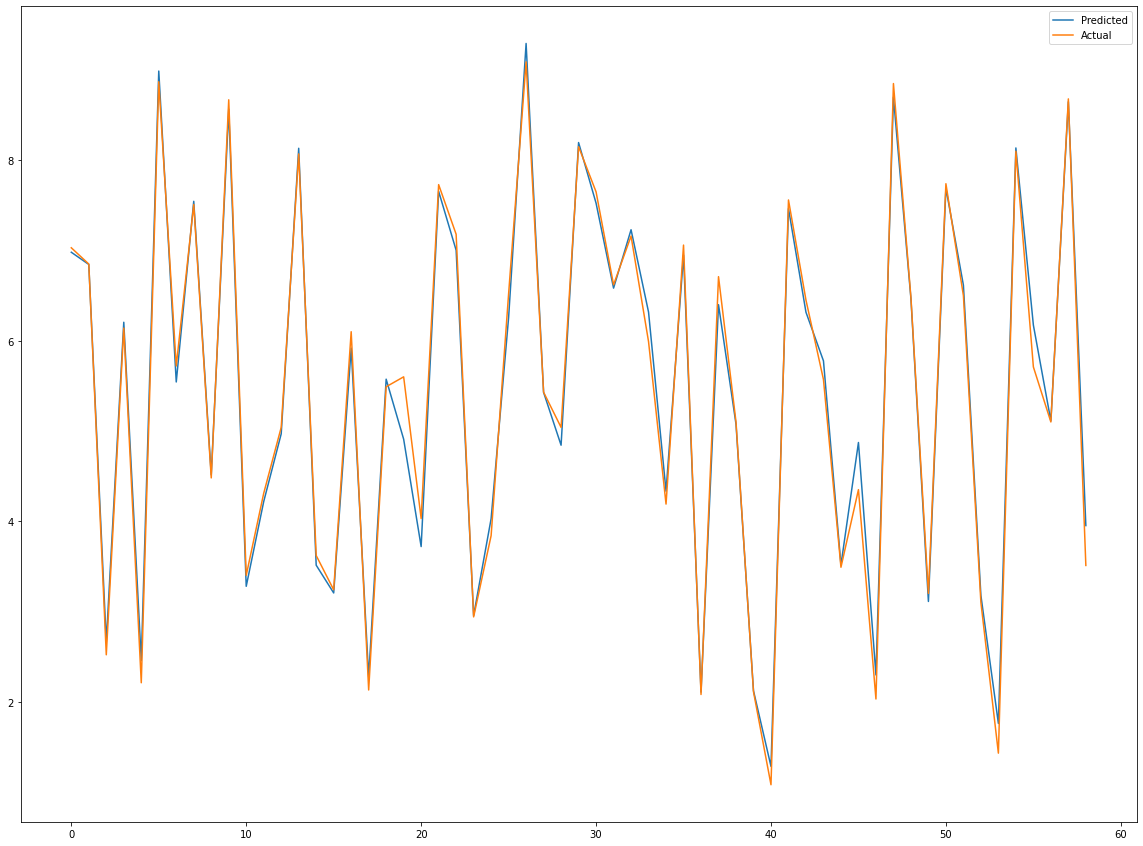

In [31]:
plt.figure(figsize=(20,15))
plt.plot(LRpred)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()